In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('actorfilms 2.csv')  # read in data
df = pd.merge(df, df, 'inner', on='FilmID')  # join data to itself to get a table of all actors connected to eachother

# drop repeated actors
df['duplicate'] = df.apply(lambda row: 1 if row['ActorID_y'] == row['ActorID_x'] else 0, axis=1)
df = df[df['duplicate'] == 0][['Actor_x', 'Actor_y', 'Film_x', 'Rating_x']]

# Filter actors only in 'Avengers: Endgame' and 'Avengers: Infinity War'
df = df[(df['Film_x'] == 'Avengers: Endgame') | (df['Film_x'] == 'Avengers: Infinity War')]

In [34]:
df.head(5)

,Actor_x,Actor_y,Film_x,Rating_x
170466,Kenneth Branagh,Samuel L. Jackson,Avengers: Infinity War,8.4
170467,Kenneth Branagh,Don Cheadle,Avengers: Infinity War,8.4
170468,Kenneth Branagh,Robert Downey Jr.,Avengers: Infinity War,8.4
170469,Kenneth Branagh,William Hurt,Avengers: Infinity War,8.4
170470,Kenneth Branagh,Gwyneth Paltrow,Avengers: Infinity War,8.4


In [35]:
# rename columns
df.rename(columns={
    'Rating_x': 'Rating',
    'Film_x': 'Film'
}, inplace=True)

In [36]:
df.head(5)

,Actor_x,Actor_y,Film,Rating
170466,Kenneth Branagh,Samuel L. Jackson,Avengers: Infinity War,8.4
170467,Kenneth Branagh,Don Cheadle,Avengers: Infinity War,8.4
170468,Kenneth Branagh,Robert Downey Jr.,Avengers: Infinity War,8.4
170469,Kenneth Branagh,William Hurt,Avengers: Infinity War,8.4
170470,Kenneth Branagh,Gwyneth Paltrow,Avengers: Infinity War,8.4


In [37]:
# Create an undirected graph
G = nx.Graph()


In [38]:
# Add edges to the graph based on the 'Actor_x' and 'Actor_y' columns
edges = df[['Actor_x', 'Actor_y']].values.tolist()
G.add_edges_from(edges)

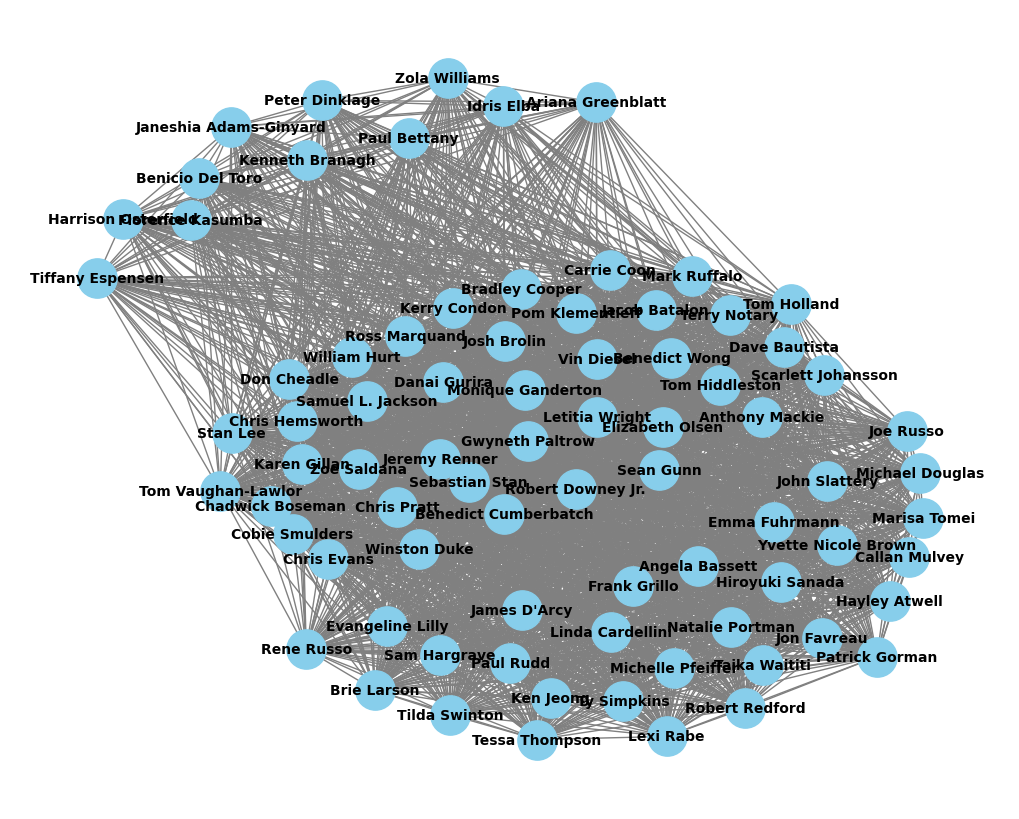

In [39]:
# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, font_size=10, node_size=800, font_color='black', node_color='skyblue', edge_color='gray', font_weight='bold')